In [1]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.0.2


Evaluating TS..........False
False
False
False
False
False
False
False
False
False
 2.1 seconds
Regret: 115.20 +/- 16.44 (median: 99.50, max: 220.00, min: 64.00)
Evaluating PHE..........False
False
False
False
False
False
False
False
False
False
 2.7 seconds
Regret: 119.30 +/- 12.67 (median: 113.00, max: 191.00, min: 52.00)
Evaluating PHE

Process Process-24:
Process Process-31:
Process Process-32:
Process Process-27:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-26:
Process Process-28:
Process Process-25:
Process Process-29:
Traceback (most recent call last):
Process Process-33:
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-30:
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multip

KeyboardInterrupt: 

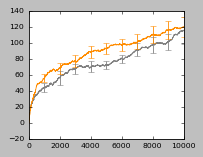

In [2]:
import datetime

algs = [
  ("TS", {}, "gray", "-", "TS"),
  #("PHE", {"a": 2.1}, "red", "-", "PHE (a = 2.1)"),
  ("PHE", {"a": 1.1}, "darkorange", "-", "PHE (a = 1.1)"),
  ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.5)"),
  #("HistorySwapping", {"swap_prob": 0.}, "gray", "-", "HS (swap_prob = 0.)"),
  ("HistorySwapping", {"swap_prob": 0.01}, "darkgreen", "-", "HS (swap_prob = 0.01)"),
  ("HistorySwapping", {"swap_prob": 0.03}, "red", "-", "HS (swap_prob = 0.03)"),
  #("HistorySwapping", {"swap_prob": 0.05}, "blue", "-", "HS (swap_prob = 0.05)"),
  #("HistorySwapping", {"swap_prob": 0.02}, "black", "-", "HS (swap_prob = 0.02)"),
  ("FreshHistorySwapping", {"swap_prob": 0.0001}, "magenta", "-", "FHS (swap_prob = 0.0003)"),
  ("FreshHistorySwapping", {"swap_prob": 0.0003}, "black", "-", "FHS (swap_prob = 0.0003)"),
  ("FreshHistorySwapping", {"swap_prob": 0.001}, "cyan", "-", "FHS (swap_prob = 0.001)"),
  #("FreshHistorySwapping", {"swap_prob": 0.003}, "darkgreen", "-", "FHS (swap_prob = 0.03)"),
]
num_runs = 10
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(5.5, 2))
for fig in range(2):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 2, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=10)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4] if alg_num // 4 == fig else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title("Bernoulli bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("Round n")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))
  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("results/FHS_{}_{}_{}_{}.jpeg".format(now.month, now.day, now.hour, now.minute), "wb") as f:
  plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

In [ ]:
import datetime

swap_probs = [0.1]#, 3e-3, 1e-2, 3e-2, 0.1]#, 0.12, 0.15, 0.2]
swap_probs_labels = ['0.1']#, '3e-3', 'e-2', '3e-2', '0.1'] #\
                     #'4e-2', '5e-2', '8e-2', '0.1', '0.15', '0.12', '0.2']

x_axis = np.arange(len(swap_probs))
num_runs = 100
n = 10000
K = 10

algs = ['HistorySwapping']
colors = {'HistorySwapping':'red'}

for fig in range(2):
  env = []
  for run in range(num_runs):
    mu = np.random.rand(K)
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(BetaBandit(mu))

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for swap_prob in swap_probs:
        regret, _ = evaluate(alg_class, {"swap_prob": swap_prob}, env, n)
        regret, all_alg = evaluate_parallel(alg_class, {"swap_prob": swap_prob}, env, n, num_process=10)
        
        # cum_regret = regret.sum(axis=0)
        # regret_means.append(cum_regret.mean())
        # regret_vars.append(cum_regret.std()/num_runs)
        
#     plt.plot(x_axis, regret_means, colors[alg], dashes=linestyle2dashes('-'), label=alg)
#     plt.errorbar(x_axis, regret_means, regret_vars, fmt="none", ecolor=colors[alg])
#     plt.xticks(x_axis, swap_probs_labels)
    
#   if fig == 0:
#     plt.title("Bernoulli bandit")
#   else:
#     plt.title("Beta bandit")
    
#   plt.xlabel("swap probability")
#   if not fig:
#     plt.ylabel("Cumulative Regret")

#   if fig <= 1:
#     plt.legend(loc="upper left", frameon=False)

# plt.tight_layout()
# # now = datetime.datetime.now()
# # with open("results/FHS_vs_SwapProb_{}_{}_{}_{}.jpeg".format(now.month, now.day, now.hour, now.minute), "wb") as f:
# #   plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
# plt.show()